In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    print(city.city_name, city.country_code) 

albany au
new norfolk au
rikitea pf
tuktoyaktuk ca
mataura pf
malangali tz
alice springs au
lagoa pt
mataura pf
upernavik gl
ushuaia ar
cherskiy ru
biak id
naze jp
vangaindrano mg
meyungs pw
saint-philippe re
butaritari ki
albany au
shitanjing cn
lagoa pt
kahului us
karasburg na
hobart au
port alfred za
ayna pe
poum nc
tuatapere nz
molchanovo ru
hilo us
puri in
tual id
jabiru au
paamiut gl
kutum sd
marzuq ly
troitskoye ru
jamestown sh
krasnoborsk ru
nikolskoye ru
arraial do cabo br
kashary ru
warmbad na
dzilam gonzalez mx
ushuaia ar
cockburn town bs
tsihombe mg
adrar dz
balfour za
mar del plata ar
victoria ar
karratha au
provideniya ru
pevek ru
airai pw
nikolskoye ru
vardo no
avera pf
butaritari ki
vaini to
jamestown sh
humaita br
hamilton bm
bambous virieux mu
salamanca cl
new norfolk au
ancud cl
sitka us
iqaluit ca
mayumba ga
port elizabeth za
ulaangom mn
atuona pf
napa us
katiola ci
bredasdorp za
chokurdakh ru
sumbawa id
conceicao das alagoas br
ostersund se
faanui pf
rikitea pf
ush

anchorage us
upernavik gl
atuona pf
kathmandu np
kapaa us
haines junction ca
arraial do cabo br
saldanha za
puerto del rosario es
albany au
tsihombe mg
taolanaro mg
rabo de peixe pt
iqaluit ca
shkotovo-26 ru
saint-philippe re
nouadhibou mr
kodiak us
clyde river ca
rawannawi ki
saint-philippe re
saint george bm
mar del plata ar
ribeira grande pt
imeni karla libknekhta ru
busselton au
kaitangata nz
upernavik gl
sao filipe cv
jamestown sh
albany au
vaitupu wf
puerto ayora ec
new norfolk au
blyth gb
busselton au
provideniya ru
ushuaia ar
haines junction ca
ushuaia ar
ketchikan us
kenai us
busselton au
upernavik gl
barrow us
tokur ru
castro cl
kaitangata nz
kloulklubed pw
ginir et
tasiilaq gl
atuona pf
hithadhoo mv
mataura pf
bhavani in
codrington ag
avarua ck
palaikastron gr
taoudenni ml
ushuaia ar
raga sd
bluff nz
kavieng pg
naze jp
rikitea pf
ribeira grande pt
da nang vn
port alfred za
vasto it
jiroft ir
tomatlan mx
ruatoria nz
muzhi ru
harper lr
pisco pe
arraial do cabo br
punta arenas 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name.title()

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Import the requests library.
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [8]:
# Create an endpoint URL for a city.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Albany
Processing Record 2 of Set 1 | New Norfolk
Processing Record 3 of Set 1 | Rikitea
Processing Record 4 of Set 1 | Tuktoyaktuk
Processing Record 5 of Set 1 | Mataura
Processing Record 6 of Set 1 | Malangali
Processing Record 7 of Set 1 | Alice Springs
Processing Record 8 of Set 1 | Lagoa
Processing Record 9 of Set 1 | Upernavik
Processing Record 10 of Set 1 | Ushuaia
Processing Record 11 of Set 1 | Cherskiy
Processing Record 12 of Set 1 | Biak
Processing Record 13 of Set 1 | Naze
Processing Record 14 of Set 1 | Vangaindrano
Processing Record 15 of Set 1 | Meyungs
City not found. Skipping...
Processing Record 16 of Set 1 | Saint-Philippe
Processing Record 17 of Set 1 | Butaritari
Processing Record 18 of Set 1 | Shitanjing
Processing Record 19 of Set 1 | Kahului
Processing Record 20 of Set 1 | Karasburg
Processing Record 21 of Set 1 | Hobart
Processing Record 22 of Set 1 | Port Alfred
Processi

Processing Record 41 of Set 4 | Temaraia
City not found. Skipping...
Processing Record 42 of Set 4 | Big Bend
Processing Record 43 of Set 4 | Fare
Processing Record 44 of Set 4 | Tanout
Processing Record 45 of Set 4 | Kysyl-Syr
Processing Record 46 of Set 4 | Torbay
Processing Record 47 of Set 4 | Ponta Do Sol
Processing Record 48 of Set 4 | Amahai
Processing Record 49 of Set 4 | Grants
Processing Record 50 of Set 4 | Pontes E Lacerda
Processing Record 1 of Set 5 | Asilah
Processing Record 2 of Set 5 | Caravelas
Processing Record 3 of Set 5 | Plaster Rock
Processing Record 4 of Set 5 | Chase
Processing Record 5 of Set 5 | Nyurba
Processing Record 6 of Set 5 | Carthage
Processing Record 7 of Set 5 | Iwaki
Processing Record 8 of Set 5 | Yarada
Processing Record 9 of Set 5 | Guerrero Negro
Processing Record 10 of Set 5 | Ondo
Processing Record 11 of Set 5 | Soma
Processing Record 12 of Set 5 | Vestmannaeyjar
Processing Record 13 of Set 5 | Hammelburg
Processing Record 14 of Set 5 | Surt
P

Processing Record 26 of Set 8 | Anchorage
Processing Record 27 of Set 8 | Kathmandu
Processing Record 28 of Set 8 | Puerto Del Rosario
Processing Record 29 of Set 8 | Rabo De Peixe
Processing Record 30 of Set 8 | Shkotovo-26
City not found. Skipping...
Processing Record 31 of Set 8 | Kodiak
Processing Record 32 of Set 8 | Rawannawi
City not found. Skipping...
Processing Record 33 of Set 8 | Saint George
Processing Record 34 of Set 8 | Imeni Karla Libknekhta
Processing Record 35 of Set 8 | Blyth
Processing Record 36 of Set 8 | Ketchikan
Processing Record 37 of Set 8 | Tokur
Processing Record 38 of Set 8 | Kloulklubed
Processing Record 39 of Set 8 | Ginir
Processing Record 40 of Set 8 | Bhavani
Processing Record 41 of Set 8 | Codrington
Processing Record 42 of Set 8 | Palaikastron
Processing Record 43 of Set 8 | Taoudenni
Processing Record 44 of Set 8 | Raga
Processing Record 45 of Set 8 | Da Nang
Processing Record 46 of Set 8 | Vasto
Processing Record 47 of Set 8 | Jiroft
City not found

Processing Record 16 of Set 12 | Kidal
Processing Record 17 of Set 12 | Malmesbury
Processing Record 18 of Set 12 | Saint-Joseph
Processing Record 19 of Set 12 | Atkinson
Processing Record 20 of Set 12 | Husavik
Processing Record 21 of Set 12 | Chagda
City not found. Skipping...
Processing Record 22 of Set 12 | Lompoc
Processing Record 23 of Set 12 | Altus
Processing Record 24 of Set 12 | Nueva Loja
Processing Record 25 of Set 12 | Vieques
Processing Record 26 of Set 12 | Monzon
Processing Record 27 of Set 12 | Boca Do Acre
Processing Record 28 of Set 12 | Garowe
Processing Record 29 of Set 12 | Marsh Harbour
Processing Record 30 of Set 12 | Ararat
Processing Record 31 of Set 12 | Miranda De Ebro
Processing Record 32 of Set 12 | Grindavik
Processing Record 33 of Set 12 | Tungor
Processing Record 34 of Set 12 | Kapuskasing
Processing Record 35 of Set 12 | Keti Bandar
Processing Record 36 of Set 12 | Seaford
Processing Record 37 of Set 12 | Jacksonville
Processing Record 38 of Set 12 | T

In [10]:
len(city_data)

587

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,35.01,68,74,3.71,US,2021-04-04 03:59:25
1,New Norfolk,-42.7826,147.0587,68.00,44,66,8.99,AU,2021-04-04 04:03:38
2,Rikitea,-23.1203,-134.9692,78.03,57,28,21.34,PF,2021-04-04 04:03:38
3,Tuktoyaktuk,69.4541,-133.0374,-13.00,77,20,6.91,CA,2021-04-04 04:03:39
4,Mataura,-46.1927,168.8643,60.01,74,79,23.00,NZ,2021-04-04 04:03:39
5,Malangali,-8.5667,34.8500,61.50,95,78,5.99,TZ,2021-04-04 04:03:39
6,Alice Springs,-23.7000,133.8833,87.01,23,0,10.36,AU,2021-04-04 04:03:39
7,Lagoa,39.0500,-27.9833,59.86,88,95,32.30,PT,2021-04-04 04:03:40
8,Upernavik,72.7868,-56.1549,-23.78,92,11,6.60,GL,2021-04-04 04:03:40
9,Ushuaia,-54.8000,-68.3000,35.60,75,40,4.61,AR,2021-04-04 04:03:40


In [12]:
city_data_df = city_data_df.iloc[:,[0,7,8,1,2,3,4,5,6]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-04-04 03:59:25,42.6001,-73.9662,35.01,68,74,3.71
1,New Norfolk,AU,2021-04-04 04:03:38,-42.7826,147.0587,68.00,44,66,8.99
2,Rikitea,PF,2021-04-04 04:03:38,-23.1203,-134.9692,78.03,57,28,21.34
3,Tuktoyaktuk,CA,2021-04-04 04:03:39,69.4541,-133.0374,-13.00,77,20,6.91
4,Mataura,NZ,2021-04-04 04:03:39,-46.1927,168.8643,60.01,74,79,23.00
...,...,...,...,...,...,...,...,...,...
582,Meadow Lake,US,2021-04-04 04:06:26,34.8014,-106.5436,66.20,26,20,11.50
583,Severodvinsk,RU,2021-04-04 04:06:26,64.5635,39.8302,28.40,80,75,2.24
584,Hearst,CA,2021-04-04 04:06:26,49.6835,-83.6665,33.80,69,100,2.30
585,Miri,MY,2021-04-04 04:06:27,4.4148,114.0089,87.80,66,40,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

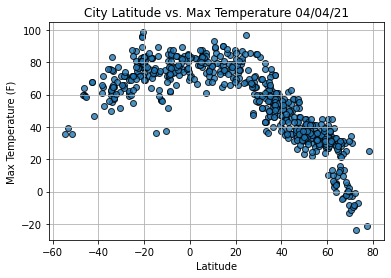

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity

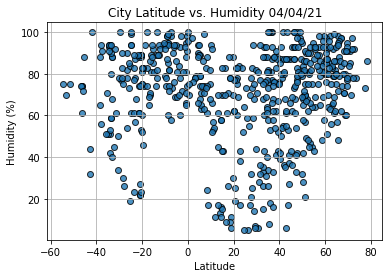

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

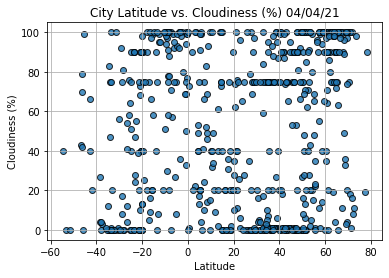

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

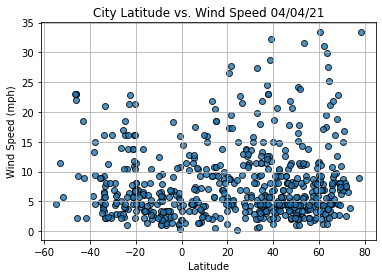

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Use Linear Regression

#### Find the Correlation Between Latitude and Maximum Temperature

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()  

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

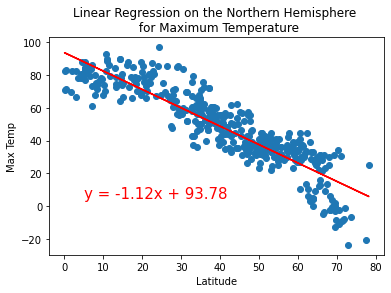

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,5))

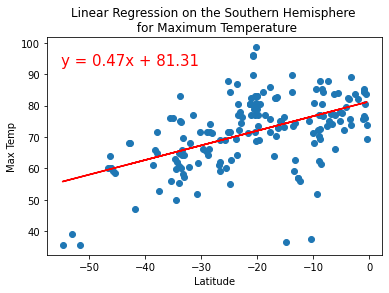

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,93))

### Find the Correlation Between Latitude and Percent Humidity

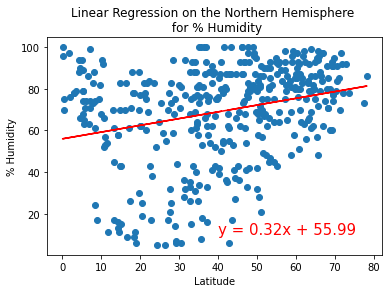

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

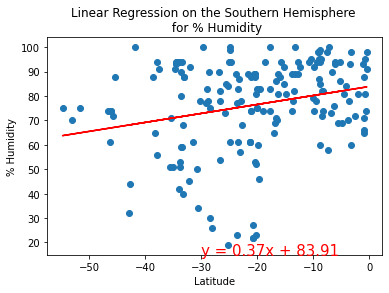

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,15))

### Find the Correlation Between Latitude and Percent Cloudiness

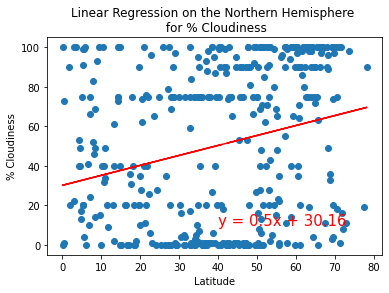

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

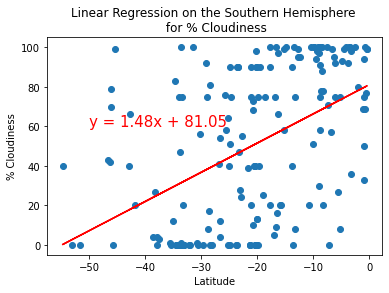

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

### Find the Correlation Between Latitude and Wind Speed

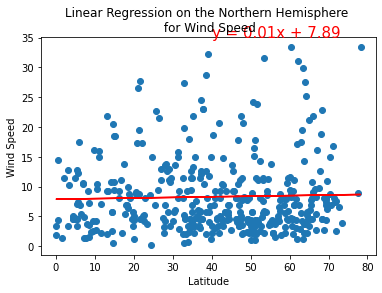

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

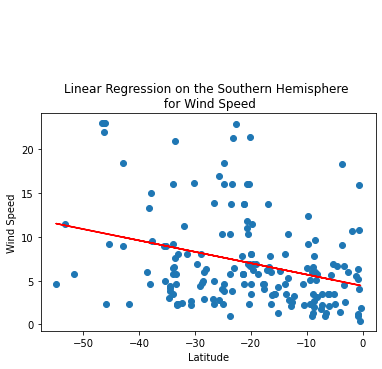

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

### Create Heatmaps for Weather Parameters

In [29]:
# Import the dependencies.
import gmaps
# Import the API key.
from config import g_key

In [30]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2021-04-04 03:59:25,42.6001,-73.9662,35.01,68,74,3.71
1,1,New Norfolk,AU,2021-04-04 04:03:38,-42.7826,147.0587,68.00,44,66,8.99
2,2,Rikitea,PF,2021-04-04 04:03:38,-23.1203,-134.9692,78.03,57,28,21.34
3,3,Tuktoyaktuk,CA,2021-04-04 04:03:39,69.4541,-133.0374,-13.00,77,20,6.91
4,4,Mataura,NZ,2021-04-04 04:03:39,-46.1927,168.8643,60.01,74,79,23.00


In [31]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     587 non-null    int64  
 1   City        587 non-null    object 
 2   Country     584 non-null    object 
 3   Date        587 non-null    object 
 4   Lat         587 non-null    float64
 5   Lng         587 non-null    float64
 6   Max Temp    587 non-null    float64
 7   Humidity    587 non-null    int64  
 8   Cloudiness  587 non-null    int64  
 9   Wind Speed  587 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 46.0+ KB


In [32]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [33]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"].map(lambda x: x if x>0 else 0)
#max_temp = max_temp.map(lambda x: x if x>0 else 0)
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Percent Humidity Heatmap

In [35]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Percent Cloudiness Heatmap

In [36]:
# Heatmap of cloudiness
locations = city_data_df[["Lat", "Lng"]]
cloudiness = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Wind Speed Heatmap

In [37]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Get Vacation Criteria

In [38]:
# Ask the customer to add a minimum and maximum temperature value.
condition = 0
while condition ==0:
    try:
        min_temp = float(input("What is the minimum temperature you would like for your trip? "))
        max_temp = float(input("What is the maximum temperature you would like for your trip? "))
        if max_temp < min_temp:
            max_temp, min_temp = min_temp, max_temp
            condition = 1
    except:
        print("Pleae input number")

What is the minimum temperature you would like for your trip? 90
What is the maximum temperature you would like for your trip? 75


In [39]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Rikitea,PF,2021-04-04 04:03:38,-23.1203,-134.9692,78.03,57,28,21.34
6,6,Alice Springs,AU,2021-04-04 04:03:39,-23.7000,133.8833,87.01,23,0,10.36
11,11,Biak,ID,2021-04-04 04:03:41,-0.9131,122.8766,85.30,66,33,0.98
14,14,Saint-Philippe,RE,2021-04-04 04:03:42,-21.3585,55.7679,80.60,61,0,5.75
15,15,Butaritari,KI,2021-04-04 04:03:42,3.0707,172.7902,82.31,78,22,12.82
22,22,Poum,NC,2021-04-04 04:03:44,-20.2333,164.0167,80.71,81,98,21.41
26,26,Puri,IN,2021-04-04 04:03:46,19.8000,85.8500,87.80,70,20,5.75
27,27,Tual,ID,2021-04-04 04:03:46,-5.6667,132.7500,83.98,69,27,5.66
39,39,Cockburn Town,TC,2021-04-04 04:03:50,21.4612,-71.1419,76.03,75,76,27.74
40,40,Adrar,MR,2021-04-04 04:03:50,20.5022,-10.0711,76.05,25,74,9.10


In [40]:
preferred_cities_df.count()

City_ID       147
City          147
Country       147
Date          147
Lat           147
Lng           147
Max Temp      147
Humidity      147
Cloudiness    147
Wind Speed    147
dtype: int64

### Map Vacation Criteria

In [41]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Rikitea,PF,78.03,-23.1203,-134.9692,
6,Alice Springs,AU,87.01,-23.7000,133.8833,
11,Biak,ID,85.30,-0.9131,122.8766,
14,Saint-Philippe,RE,80.60,-21.3585,55.7679,
15,Butaritari,KI,82.31,3.0707,172.7902,
22,Poum,NC,80.71,-20.2333,164.0167,
26,Puri,IN,87.80,19.8000,85.8500,
27,Tual,ID,83.98,-5.6667,132.7500,
39,Cockburn Town,TC,76.03,21.4612,-71.1419,
40,Adrar,MR,76.05,20.5022,-10.0711,


In [42]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [46]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except:
        print(f"Hotel not found for city {row['City']}...skipping.")

Hotel not found for city Adrar...skipping.
Hotel not found for city Angoram...skipping.
Hotel not found for city Thinadhoo...skipping.
Hotel not found for city Taoudenni...skipping.
Hotel not found for city Araouane...skipping.
Hotel not found for city Simi...skipping.


In [47]:
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Rikitea,PF,78.03,-23.1203,-134.9692,Pension Maro'i
6,Alice Springs,AU,87.01,-23.7000,133.8833,Desert Palms Alice Springs
11,Biak,ID,85.30,-0.9131,122.8766,Penginapan Kim
14,Saint-Philippe,RE,80.60,-21.3585,55.7679,"Chambres d'hôte ""La Trinité"""
15,Butaritari,KI,82.31,3.0707,172.7902,Isles Sunset Lodge


In [48]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"].map(lambda x: x if x>0 else 0)
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"].map(lambda x: x if x >0 else 0)
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [51]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [52]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"].map(lambda x: x if x >0 else 0)
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))